# Actividad 1: Problemas de Regresión

A01285158 | Grace Aviance Silva Aróstegui

# EJERCICIO 1

El conjunto de datos de esperanzas de vida (Life Expectancy (WHO) | Kaggle) tiene el registro de la esperanza de vida de 193 países medida en diferentes años, junto con otras variables que se pueden relacionar con riesgos a la salud y la mortalidad.

Para este ejercicio, sólo se considerará como variable dependiente la cuarta columna ("Life expectancy"). A su vez, las variables independientes de interés son:

* X1 - Adult mortality
* X2 - Infant deaths
* X3 - Alcohol
* X4 - Percentage expenditure
* X5 - Hepatitis B
* X6 - Measles
* X7 - BMI
* X8 - Under-five deaths
* X9 - Polio
* X10 - Total expenditure
* X11 - Diphtheria
* X12 - HIV/AIDS   
* X13 - GDP
* X14 - Population
* X15 - Thinness  1-19 years
* X16 - Thinness 5-9 years
* X17 - Income composition of resources
* X18 - Schooling

Nota 1: Las variables con las que vas a trabajar depende del **penúltimo número de tu matrícula** de acuerdo a la siguiente lista:

- 0, 1 - Todas las variables, menos X1, X5, X9, X13, X17
- 2, 3 - Todas las variables, menos X2, X6, X10, X14, X18
- **4, 5 - Todas las variables, menos X3, X7, X11, X15**
- 6, 7 - Todas las variables, menos X4, X8, X12, X16
- 8, 9 - Todas las variables, menos X5, X9, X13, X17

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Primeramente reduciremos el dataset mantieniendo las que sean de interes
df = pd.read_csv("life_expectancy_data.csv")
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [3]:
extra_columns = ['Country', 'Year', 'Status']
df = df.drop(extra_columns, axis=1)
df.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
# Excluyendo aquellas de acuerdo a la "Nota 1", las cuales son todas menos X3 (Alcohol), X7 (BMI), X11 (Diphtheria), X15 (thinness 5-9 years)
columns_note1 = ['Alcohol', ' BMI ', 'Diphtheria ', ' thinness  1-19 years']
df = df.drop(columns_note1, axis=1)
df.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths',
       'percentage expenditure', 'Hepatitis B', 'Measles ',
       'under-five deaths ', 'Polio', 'Total expenditure', ' HIV/AIDS', 'GDP',
       'Population', ' thinness 5-9 years', 'Income composition of resources',
       'Schooling'],
      dtype='object')

In [5]:
# Ya tenemos nuestro Dataset. Revisaremos que no hayan datos Nulos
df.isnull().sum()

Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
under-five deaths                    0
Polio                               19
Total expenditure                  226
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
df.dropna(subset=['Life expectancy ', 'Adult Mortality', 'Hepatitis B', 'Polio', 'Total expenditure',
                  'GDP', 'Population', ' thinness 5-9 years', 'Income composition of resources',
                  'Schooling'], inplace=True)
df.isnull().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
under-five deaths                  0
Polio                              0
Total expenditure                  0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

#### 1. Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.

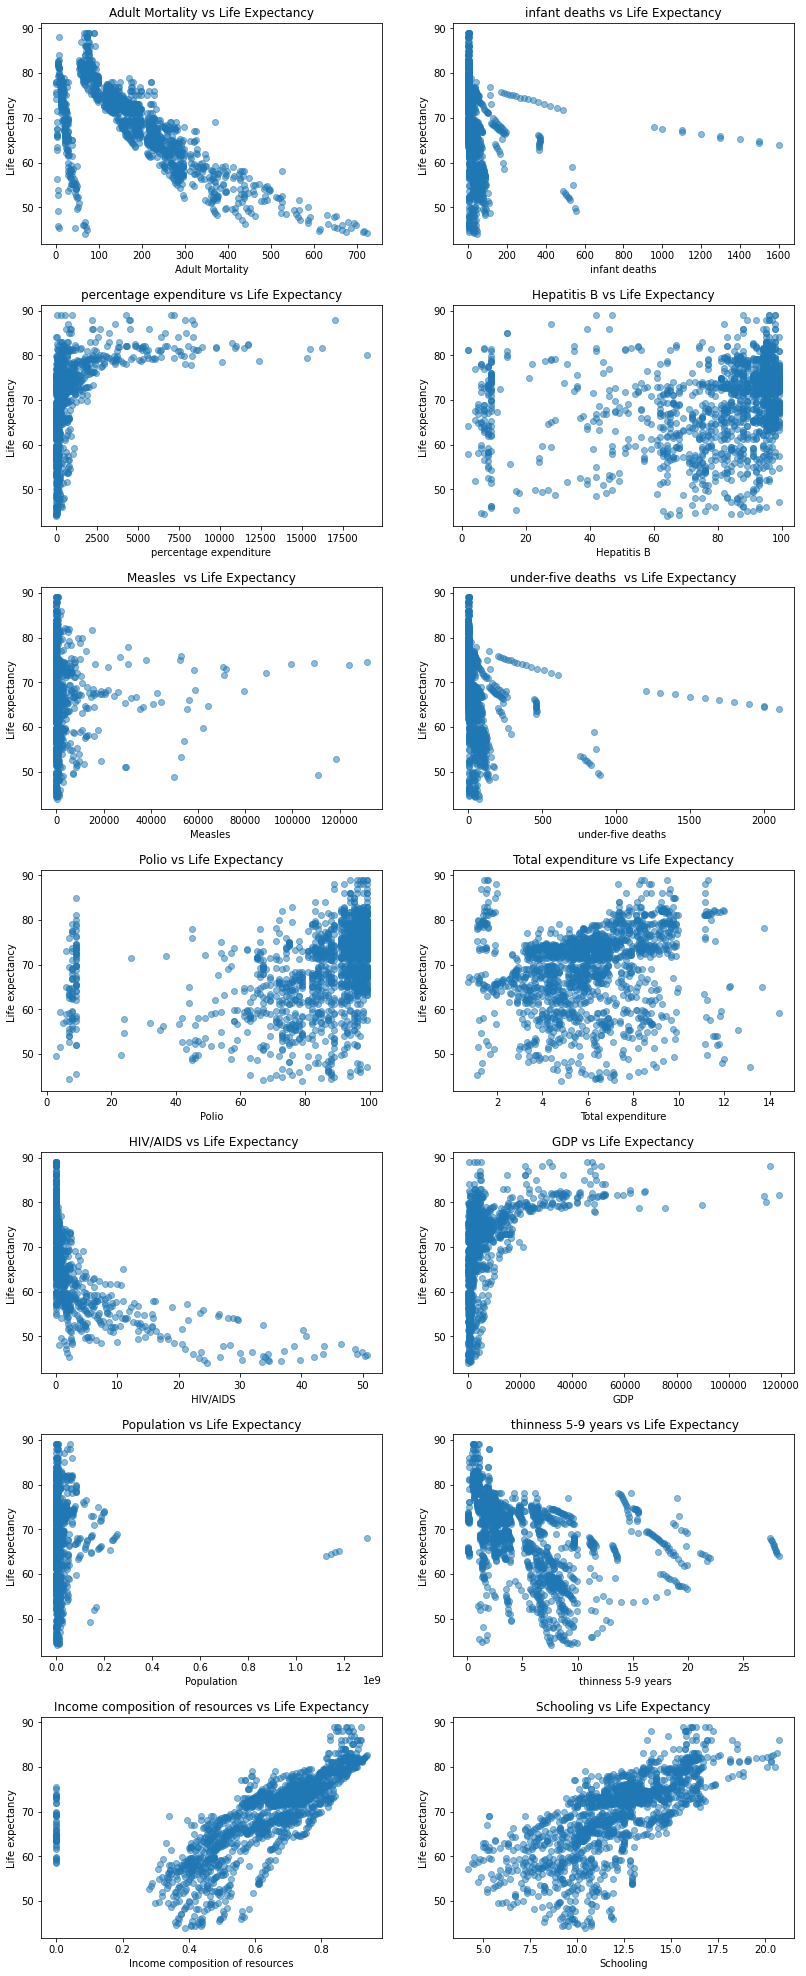

In [7]:
# Variables predictoras
vars_independientes = ['Adult Mortality', 'infant deaths', 'percentage expenditure', 'Hepatitis B', 'Measles ',
                  'under-five deaths ', 'Polio', 'Total expenditure', ' HIV/AIDS', 'GDP',
                  'Population', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

fig, axs = plt.subplots(7, 2, figsize=(12, 28))  # 7 renglones, 2 columnas, tamaño de la figura
fig.tight_layout(pad=4.0)  # Espacio entre gráficos

for i, var in enumerate(vars_independientes):
    row = i // 2  # Determina el índice de la fila
    col = i % 2   # Determina el índice de la columna

    axs[row, col].scatter(df[var], df['Life expectancy '], alpha=0.5)
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Life expectancy ')
    axs[row, col].set_title(f'{var} vs Life Expectancy')

plt.show()

#### 2. Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.

Dado que tenemos varias variables predictoras (independientes), nuestro modelo de Regresión Lineal sería Múltiple.
Existe la Regresión Lineal Múltiple con optimización de Descenso Gradiente.
Elegí sin descenso gradiente ya que:
- El tamaño del sataset es pequeño, tiene menos de 10,000 muestras y menos de 100 características
- No hay problemas de multicolinealidad

In [8]:
# Antes de hacer el modelo, escalamos los datos

x = df[['Adult Mortality', 'infant deaths', 'percentage expenditure', 'Hepatitis B', 'Measles ',
                  'under-five deaths ', 'Polio', 'Total expenditure', ' HIV/AIDS', 'GDP',
                  'Population', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = df['Life expectancy '] # Variable de respuesta

x_scaled = StandardScaler().fit_transform(x)

# Matriz con valores de las variables independientes escaladas
X = np.column_stack((np.ones(x_scaled.shape[0]), x_scaled))

# Fit model function (it fits a linear model using the specified data set).
def fit_model(X, y):
    return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

# Predict function (it evaluates an array of observations using the specified linear model).
def predict(X, beta):
    return X @ beta

# Build linear model
beta = fit_model(X, y)
#np.set_printoptions(suppress=True)
print ("Model coefficients: ", beta)

Model coefficients:  [ 6.93023044e+01 -2.18560185e+00  1.22898976e+01  6.77917958e-01
 -9.97287431e-03 -1.47856294e-01 -1.24489688e+01  2.53510851e-01
  1.95191864e-01 -2.67056877e+00  8.99806028e-02 -1.87859898e-02
 -4.87343711e-01  1.86699223e+00  2.55796319e+00]


#### 3. Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de $R^2$, MSE y MAE

In [9]:
# Residuals
y_pred = predict(X, beta)
r = y - y_pred

# Calculate MSE, MAE and R^2 with the training set
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

MSE:  13.08532811014522
MAE:  2.773793947439496
R^2:  0.8308019870625327


In [10]:
X = np.column_stack((np.ones(x_scaled.shape[0]), x_scaled))
y = y.values
# Evaluate model with cross validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)

mse_cv = []
mae_cv = []
r2_cv = []
for train_index, test_index in kf.split(X):

    # Training phase
    x_train = X[train_index, :]
    y_train = y[train_index]

    beta_cv = fit_model(x_train, y_train)

    # Test phase
    x_test = X[test_index, :]
    y_test = y[test_index]

    y_pred = predict(x_test, beta_cv)

    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    #print('mse = ', mse_i)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    #print('mae = ', mae_i)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    #print('r^2= ', r2_i)
    r2_cv.append(r2_i)

print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))

MSE: 13.391850356756162   MAE: 2.8048269248638156   R^2: 0.8261617260877581


#### 4. Utiliza validación cruzada de Monte Carlo con 1000 iteraciones para encontrar histogramas de $R^2$, MSE y MAE.

MSE: 13.422741567779054   MAE: 2.8047238405132267   R^2: 0.825507725651008


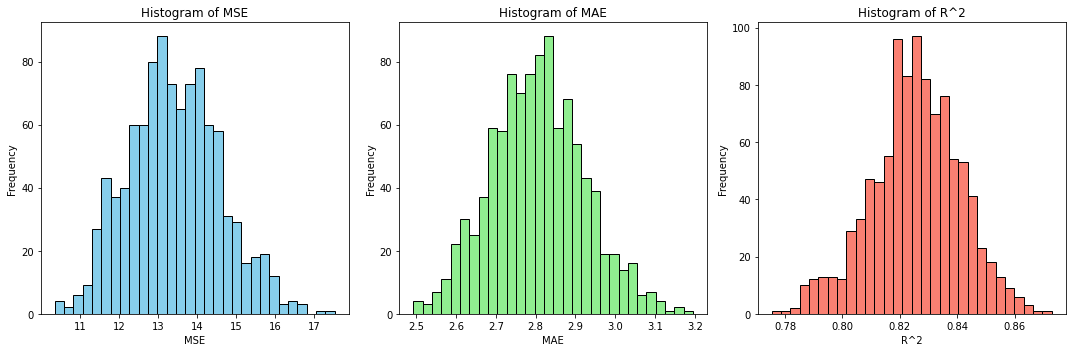

In [13]:
from sklearn.model_selection import train_test_split

# Listas para almacenar los resultados de cada iteración
mse_list = []
mae_list = []
r2_list = []

# Monte Carlo, 1000 iteraciones
for _ in range(1000):
    # Dividir los datos. 80% Entrenamiento, 20% Prueba)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Ajustar el modelo
    beta = fit_model(X_train, y_train)

    # Hacer predicciones
    y_pred = predict(X_test, beta)

    # Calcular MSE, MAE y R^2
    mse_list.append(mean_squared_error(y_test, y_pred))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

print('MSE:', np.average(mse_list), '  MAE:', np.average(mae_list),'  R^2:', np.average(r2_list))

# Graficar los histogramas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(mse_list, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mae_list, bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of MAE')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(r2_list, bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of R^2')
plt.xlabel('R^2')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### 5. Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de MSE y MAE. ¿Los histogramas son distintos a los obtenidos con el método de Monte Carlo?

MSE: 13.374834581890257   MAE: 2.8018956192333357


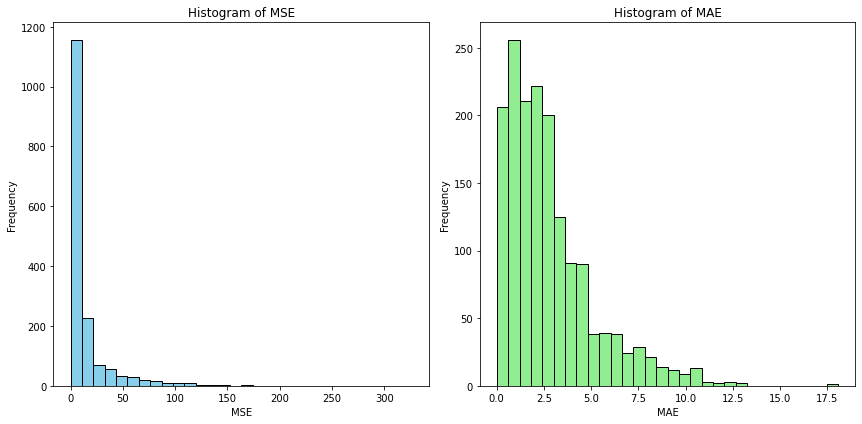

In [14]:
# Evaluate model with LOOCV
n_samples = len(X)
kf = KFold(n_splits=n_samples, shuffle=True)

mse_cv = []
mae_cv = []
for train_index, test_index in kf.split(X):

    # Training phase
    x_train = X[train_index, :]
    y_train = y[train_index]
    beta_cv = fit_model(x_train, y_train)

    # Test phase
    x_test = X[test_index, :]
    y_test = y[test_index]
    y_pred = predict(x_test, beta_cv)

    # Calculate MSE, MAE, and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)

# Summary statistics
print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv))

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)

plt.subplot(1, 3, 1)
plt.hist(mse_cv, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mae_cv, bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of MAE')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

La diferencia entre los histogramas de validación cruzada y Monte Carlo son totalmente diferentes. Los histogramas de Monte Carlo tiene mayor variabilidad (lo cual tiene sentido por el hecho de ser un método mucho más robusto) y tiende a una distribución similar a la gaussiana. Mientras que los histogramas de validación cruzada están muy sesgadas a la derecha, con la mayoría de los datos tendiendo a agruparse a las primeras clases

#### 6. Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, $X_{11}^2$, $X_{13}^2$), así como los productos entre pares de variables (por ejemplo,  $X_1$ x $X_2$, $X_3$ x $X_4$). Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.

In [20]:
df.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths',
       'percentage expenditure', 'Hepatitis B', 'Measles ',
       'under-five deaths ', 'Polio', 'Total expenditure', ' HIV/AIDS', 'GDP',
       'Population', ' thinness 5-9 years', 'Income composition of resources',
       'Schooling'],
      dtype='object')

In [21]:
df['Polio_x_HepatitisB'] = df['Polio'] * df['Hepatitis B']
df['GDP_x_Population'] = df['GDP'] * df['Population']
df['Schooling_x_Measles'] = df['Schooling'] * df['Measles ']

df['Polio_^2'] = df['Polio'] ** 2
df['Infant_Deaths_^2'] = df['infant deaths'] ** 2
df['Total_expenditure_^2'] = df['Total expenditure'] ** 2

df6 = df
df6.head(4)

,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,under-five deaths,Polio,Total expenditure,HIV/AIDS,...,Population,thinness 5-9 years,Income composition of resources,Schooling,Polio_x_HepatitisB,GDP_x_Population,Schooling_x_Measles,Polio_^2,Infant_Deaths_^2,Total_expenditure_^2
0,65.0,263.0,62,71.279624,65.0,1154,83,6.0,8.16,0.1,...,33736494.0,17.3,0.479,10.1,390.0,1.971086e+10,11655.4,36.0,3844,66.5856
1,59.9,271.0,64,73.523582,62.0,492,86,58.0,8.18,0.1,...,327582.0,17.5,0.476,10.0,3596.0,2.007083e+08,4920.0,3364.0,4096,66.9124
2,59.9,268.0,66,73.219243,64.0,430,89,62.0,8.13,0.1,...,31731688.0,17.7,0.470,9.9,3968.0,2.004633e+10,4257.0,3844.0,4356,66.0969
3,59.5,272.0,69,78.184215,67.0,2787,93,67.0,8.52,0.1,...,3696958.0,18.0,0.463,9.8,4489.0,2.476810e+09,27312.6,4489.0,4761,72.5904


In [44]:
df6.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths',
       'percentage expenditure', 'Hepatitis B', 'Measles ',
       'under-five deaths ', 'Polio', 'Total expenditure', ' HIV/AIDS', 'GDP',
       'Population', ' thinness 5-9 years', 'Income composition of resources',
       'Schooling', 'Polio_x_HepatitisB', 'GDP_x_Population',
       'Schooling_x_Measles', 'Polio_^2', 'Infant_Deaths_^2',
       'Total_expenditure_^2'],
      dtype='object')

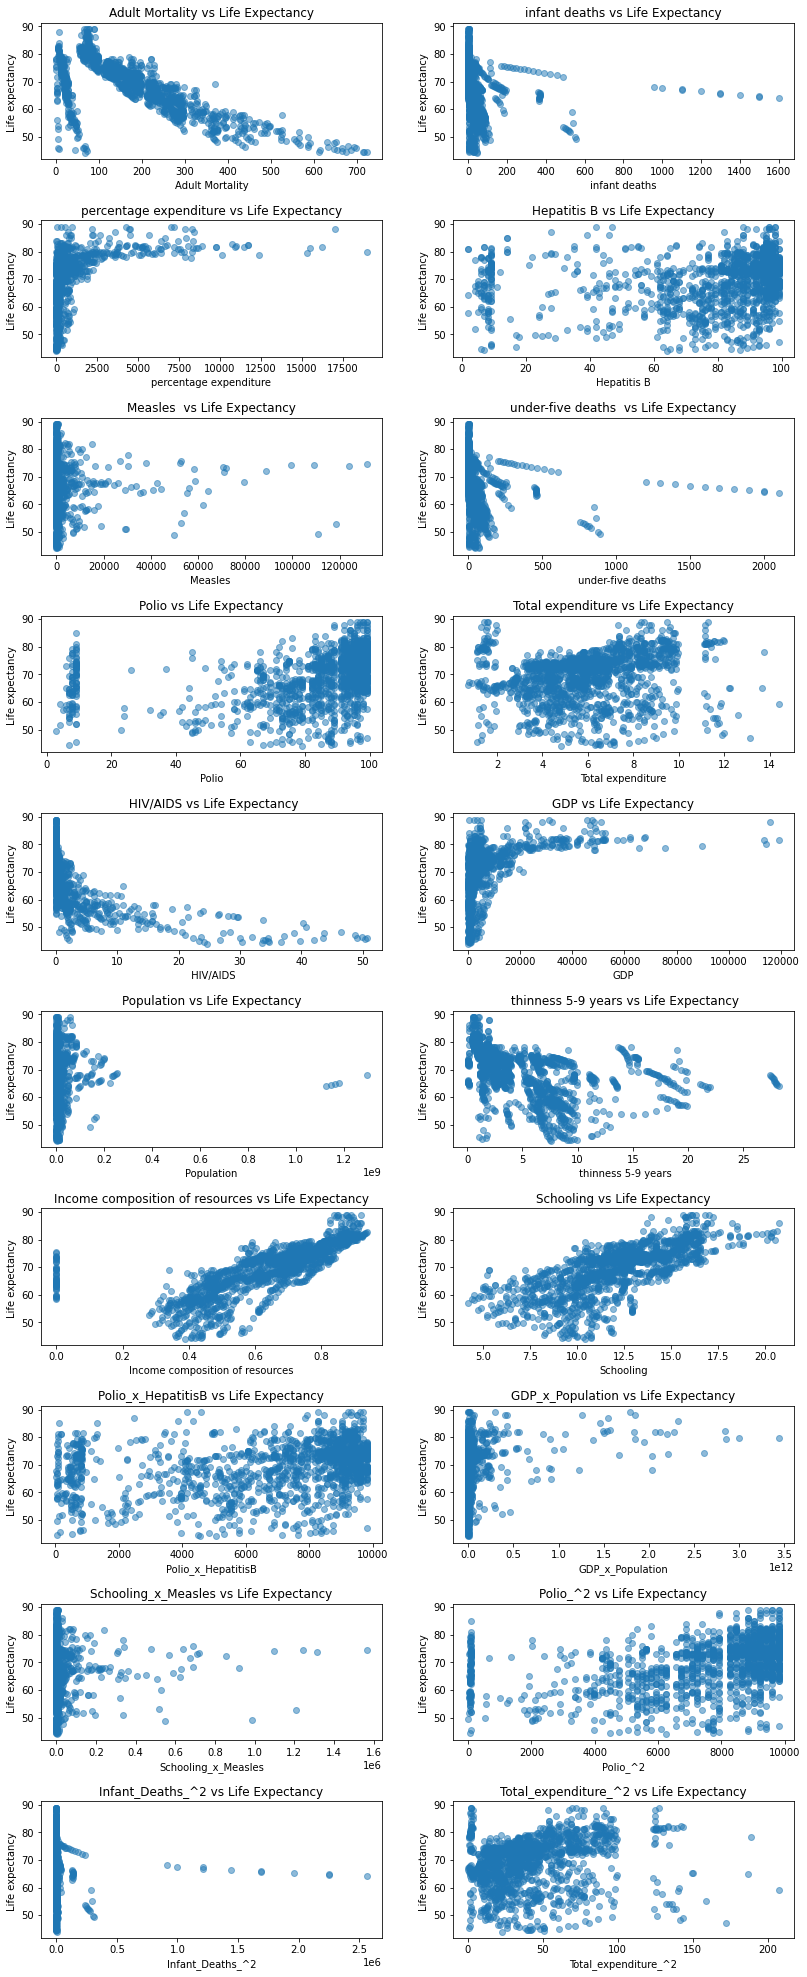

In [45]:
### PUNTO 1
### 1. Grafica cada variable predictora vs
### la variable de respuesta asignadas a tu número de matrícula.

# Variables predictoras
vars_independientes_6 = ['Adult Mortality', 'infant deaths',
       'percentage expenditure', 'Hepatitis B', 'Measles ',
       'under-five deaths ', 'Polio', 'Total expenditure', ' HIV/AIDS', 'GDP',
       'Population', ' thinness 5-9 years', 'Income composition of resources',
       'Schooling', 'Polio_x_HepatitisB', 'GDP_x_Population',
       'Schooling_x_Measles', 'Polio_^2', 'Infant_Deaths_^2',
       'Total_expenditure_^2']

fig, axs = plt.subplots(10, 2, figsize=(12, 28))  # 10 renglones, 2 columnas
fig.tight_layout(pad=4.0)  # Espacio entre gráficos

for i, var in enumerate(vars_independientes_6):
    row = i // 2  # Determina el índice de la fila
    col = i % 2   # Determina el índice de la columna

    axs[row, col].scatter(df6[var], df6['Life expectancy '], alpha=0.5)
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Life expectancy ')
    axs[row, col].set_title(f'{var} vs Life Expectancy')

plt.show()

In [48]:
df6['Adult Mortality'].dtype

dtype('float64')

In [52]:
### PUNTO 2
### Obtener los coeficientes del modelo de regresion

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fit model function (it fits a linear model using the specified data set).
def fit_model(X_6, y_6):
    return np.linalg.inv(X_6.transpose() @ X_6) @ X_6.transpose() @ y_6

# Predict function (it evaluates an array of observations using the specified linear model).
def predict(X_6, beta_6):
    return X_6 @ beta_6

# Generate data
x_6 = df6.values
X_6 = np.column_stack((np.ones(x_6.shape[0]), x_6))

# Variable de respuesta
y_6 = df6['Life expectancy '].values

# Build linear model
beta_6 = fit_model(X_6, y_6)
print ("Model coefficients: ", beta_6)

Model coefficients:  [-1.47657400e-10  1.00000000e+00  9.75627389e-14  6.27429966e-14
 -3.45334740e-15 -2.79829545e-13 -1.15876648e-16 -5.23939616e-14
  1.70411103e-13 -2.59195443e-13 -1.49332369e-13 -3.23608937e-17
 -1.91708477e-21  6.00951580e-15  1.74745461e-11  8.83095680e-14
  6.19702857e-16  1.97735875e-25  6.98209258e-18 -1.12978229e-15
  4.96849675e-18  1.48440288e-14]


In [53]:
### PUNTO 3.
### Evalúa con validación cruzada de k-pliegues tu modelo,
### calculando los valores de $R^2$, MSE y MAE.

# Residuals
y_pred_6 = predict(X_6, beta_6)
r_6 = y_6 - y_pred_6

# Calculate MSE, MAE and R^2 with the training set
print('MSE: ', mean_squared_error(y_6, y_pred_6))
print("MAE: ", mean_absolute_error(y_6, y_pred_6))
print("R^2: ", r2_score(y_6, y_pred_6))

# Evaluate model with cross validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)

mse_cv_6 = []
mae_cv_6 = []
r2_cv_6 = []
for train_index_6, test_index_6 in kf.split(x_6):

    # Training phase
    x_train_6 = x_6[train_index, :]
    y_train_6 = y_6[train_index]

    beta_cv_6 = fit_model(x_train_6, y_train_6)

    # Test phase
    x_test_6 = x_6[test_index_6, :]
    y_test_6 = y_6[test_index_6]

    y_pred_6 = predict(x_test_6, beta_cv_6)

    # Calculate MSE, MAE and R^2
    mse_i_6 = mean_squared_error(y_test_6, y_pred_6)
    print('mse = ', mse_i_6)
    mse_cv_6.append(mse_i_6)

    mae_i_6 = mean_absolute_error(y_test_6, y_pred_6)
    print('mae = ', mae_i_6)
    mae_cv_6.append(mae_i_6)

    r2_i_6 = r2_score(y_test_6, y_pred_6)
    print('r^2= ', r2_i_6)
    r2_cv_6.append(r2_i_6)

print('MSE:', np.average(mse_cv_6), '  MAE:', np.average(mae_cv_6),'  R^2:', np.average(r2_cv_6))

MSE:  2.1158358197966936e-22
MAE:  1.1033246414061442e-11
R^2:  1.0
mse =  1.8023191537026032e-21
mae =  3.1259746306618165e-11
r^2=  1.0
mse =  2.0960803359932916e-21
mae =  3.340545617902535e-11
r^2=  1.0
mse =  1.9300361220905918e-21
mae =  3.3159780645236783e-11
r^2=  1.0
mse =  1.8644657472353603e-21
mae =  3.166428197084425e-11
r^2=  1.0
mse =  1.3386381541900424e-21
mae =  2.8204205603904313e-11
r^2=  1.0
MSE: 1.806307902642378e-21   MAE: 3.1538694141125766e-11   R^2: 1.0


#### 7. Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado).

In [55]:
import numpy.linalg as ln

In [56]:
# Rango de valores Lambda
lambdas = np.logspace(-4, 4, 100)  # Escala logarítmica de 10^-2 a 10^4

# Vector para almacenamiento de cada lambda
Coeficientes = []

# Ridge regression
def ridge_grad(X, y, beta, lambda_reg):
    n = len(y)
    y_predict = X @ beta
    res = y - y_predict
    grad_mse = -(2 / n) * (X.T @ res)
    grad_ridge = 2 * lambda_reg * beta
    return grad_mse + grad_ridge

# Función para realizar la regresión Ridge utilizando descenso de gradiente
def ridge_regression_gradient_descent(X, y, alpha=0.003, lambda_reg=0.6, maxit=10000):
    npredictors = X.shape[1]
    beta = np.random.randn(npredictors) * 0.01
    it = 0

    while (ln.norm(ridge_grad(X, y, beta, lambda_reg)) > 1e-4) and (it < maxit):
        grad = ridge_grad(X, y, beta, lambda_reg)
        grad = np.clip(grad, -1, 1)  # Evitamos overflow
        beta = beta - alpha * grad
        it += 1

    return beta

# Ejecutamos la regression de Ridge
for lambda_reg in lambdas:
    beta_ridge = ridge_regression_gradient_descent(X, y, alpha=0.003, lambda_reg=lambda_reg)
    Coeficientes.append(beta_ridge)

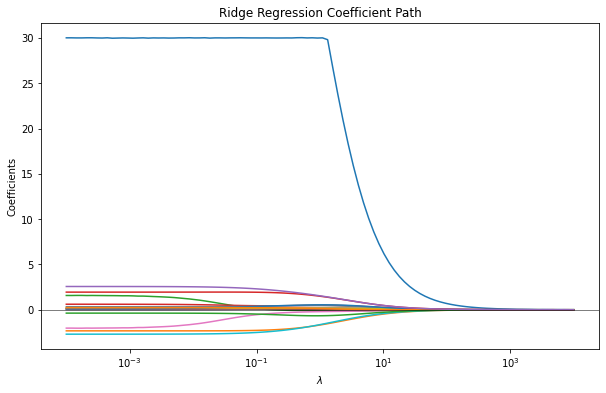

In [57]:
Coeficientes = np.array(Coeficientes)

plt.figure(figsize=(10, 6))
for i in range(Coeficientes.shape[1]):
    plt.plot(lambdas, Coeficientes[:, i], label=f'Coef {i+1}')
plt.xscale('log')
plt.xlabel(r'$\lambda$')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficient Path')
plt.axhline(0, color='black', lw=0.5)
plt.show()

#### 8. Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado). ¿Qué variables son más relevantes para el modelo?

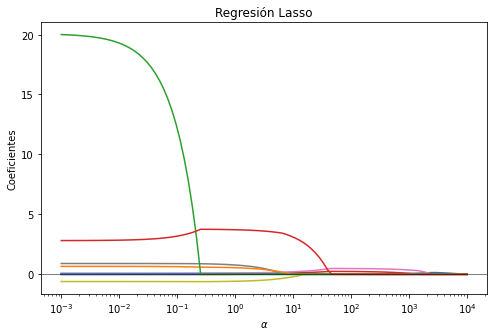

In [58]:
from sklearn.linear_model import Lasso

# Definir un rango de valores para el parámetro de regularización (alpha) en Lasso
alpha_values = np.logspace(-3, 4, 100)
coefficients = []

# Ajustar el modelo Lasso para cada alpha y guardar los coeficientes resultantes
for alpha_value in alpha_values:
    lasso_model = Lasso(alpha=alpha_value, fit_intercept=False, max_iter=10000)
    lasso_model.fit(x, y)
    coefficients.append(lasso_model.coef_)

coefficients = np.array(coefficients)

# Crear la gráfica de los coeficientes en la regresión Lasso
plt.figure(figsize=(8, 5))
for index in range(coefficients.shape[1]):
    plt.plot(alpha_values, coefficients[:, index], label=f'Coef {index + 1}')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Coeficientes')
plt.title('Regresión Lasso')
plt.axhline(0, color='black', linewidth=0.5)
plt.show()


#### 9. Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:

(a) ¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?

Si, porque tanto para validación cruzada como Monte Carlo se obtuvo el valor de $R^2$ muy bueno de 0.82 y los valores de errores de las predicciones, MSE y MAE son pequeños.

(b) ¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada? 

Realmente no hay una variabilidad importante en las métricas de evalucación. Para MSE es estre 13.422 y 13.3748 sus valores. MAE entre 2.8047 y 2.80189. Como podemos observar es muy insignificante

(c) ¿Qué modelo es mejor para los datos del problema, el lineal o el cuadrático? ¿Por qué?

Al no haber evaluado con un modelo cuadrático no se puede comparar y definir cuál modelo es mejor para los datos de este problema. Tendríamos que comparar los valores de los errores MSE y MAE, si fuesen menores entonces se pudiese concluir que capta mejor las relaciones entre las variables independientes y dependiente. 

(d) ¿Qué variables son más relevantes para el modelo según Ridge y Lasso?

Para Lasso, mientras alpha reduce los coeficientes tienden a cero haciendo así otras variables más significativas y destacando las que más aportan al modelo. Mientras que para Ridge, conforme aumenta lambda disminuyen los coeficientes y así resaltan las que aportan también más al modelo.

(e) ¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?

Que los predictoroes más significativos son aquellos que tanto en Ridge como en Lasso se ven menos afectados al alterar alpha y lambda, por ende puede representar que tengan mayor relación con la respuesta.

# EJERCICIO 2

Considere el conjunto de datos de seguimiento telemétrico de la enfermedad de Parkinson (Parkinsons Telemonitoring - UCI Machine Learning Repository), el cual contiene 19 características entre las cuales hay varias derivadas de grabaciones de voz de pacientes con Parkinson. La idea es crear un modelo que prediga a partir de la voz de un paciente la severidad de su enfermedad, la cual es cuantificada con una escala estándar médica llamada UPDRS.

Las características de este conjunto de datos son las siguientes:

- X1 - age
- X2 - test_time
- X3 - Jitter (%)
- X4 - Jitter (Abs)
- X5 - Jitter: RAP
- X6 - Jitter: PPQ5
- X7 - Jitter: DDP
- X8 - Shimmer
- X9- Shimmer (dB)
- X10 - Shimmer: APQ3
- X11 - Shimmer: APQ5
- X12 - Shimmer: APQ11
- X13 - Shimmer: DDA
- X14 - NHR
- X15 - HNR
- X16 - RPDE
- X17 - DFA
- X18 - PPE
- X19 - sex

Como variables dependientes, se tienen **motor_UPDRS** y **total_UPDRS**. Para este ejercicio, se te asignó un conjunto de variables predictoras y una de las variables dependientes de acuerdo a tu matrícula.

_Nota: Las variables con las que vas a trabajar depende del último número de tu matrícula de acuerdo a la siguiente lista:_  A01285158
* 8 -  Todas las variables predictoras, menos X4, X8, X12, X16, la variable motor_UPDRS como variable a predecir.



In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
parkinsons_telemonitoring = fetch_ucirepo(id=189)

# data (as pandas dataframes)
x = parkinsons_telemonitoring.data.features
y = parkinsons_telemonitoring.data.targets

In [6]:
x

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex
0,72,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0
1,72,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0
2,72,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0
3,72,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,0
4,72,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,142.7900,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367,0
5871,61,149.8400,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621,0
5872,61,156.8200,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157,0
5873,61,163.7300,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204,0


In [7]:
x = x.drop(['Jitter(Abs)', 'Shimmer', 'Shimmer:APQ11', 'RPDE'], axis=1)
x

,age,test_time,Jitter(%),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,DFA,PPE,sex
0,72,5.6431,0.00662,0.00401,0.00317,0.01204,0.230,0.01438,0.01309,0.04314,0.014290,21.640,0.54842,0.16006,0
1,72,12.6660,0.00300,0.00132,0.00150,0.00395,0.179,0.00994,0.01072,0.02982,0.011112,27.183,0.56477,0.10810,0
2,72,19.6810,0.00481,0.00205,0.00208,0.00616,0.181,0.00734,0.00844,0.02202,0.020220,23.047,0.54405,0.21014,0
3,72,25.6470,0.00528,0.00191,0.00264,0.00573,0.327,0.01106,0.01265,0.03317,0.027837,24.445,0.57794,0.33277,0
4,72,33.6420,0.00335,0.00093,0.00130,0.00278,0.176,0.00679,0.00929,0.02036,0.011625,26.126,0.56122,0.19361,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,142.7900,0.00406,0.00167,0.00168,0.00500,0.160,0.00973,0.01133,0.02920,0.025137,22.369,0.55314,0.21367,0
5871,61,149.8400,0.00297,0.00119,0.00147,0.00358,0.215,0.01052,0.01277,0.03157,0.011927,22.886,0.56518,0.12621,0
5872,61,156.8200,0.00349,0.00152,0.00187,0.00456,0.244,0.01371,0.01456,0.04112,0.017701,25.065,0.57888,0.14157,0
5873,61,163.7300,0.00281,0.00128,0.00151,0.00383,0.131,0.00693,0.00870,0.02078,0.007984,24.422,0.56327,0.14204,0


In [8]:
y

,motor_UPDRS,total_UPDRS
0,28.199,34.398
1,28.447,34.894
2,28.695,35.389
3,28.905,35.810
4,29.187,36.375
...,...,...
5870,22.485,33.485
5871,21.988,32.988
5872,21.495,32.495
5873,21.007,32.007


In [9]:
y = y.drop(['total_UPDRS'],axis=1)
y

,motor_UPDRS
0,28.199
1,28.447
2,28.695
3,28.905
4,29.187
...,...
5870,22.485
5871,21.988
5872,21.495
5873,21.007


In [10]:
x = x.to_numpy()
y = y.to_numpy()

Para este conjunto de datos y las variables que se te asignaron:

#### 1. Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest, r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [12]:
###### Train linear regression model
regr = linear_model.LinearRegression()
regr.fit(x, y)
print("Coeficientes del modelo: ", regr.coef_)
print("Intercepto del modelo : ", regr.intercept_)

y_pred = regr.predict(x)
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

# k-fold cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)

mse_cv = []
mae_cv = []
r2_cv = []
for train_index, test_index in kf.split(x):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]     
    
    fselection_cv = SelectKBest(r_regression, k=5)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    regr_cv = linear_model.LinearRegression()
    regr_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = regr_cv.predict(x_test)
    
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)    
    r2_cv.append(r2_i)    

print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))

Coeficientes del modelo:  [[ 1.96998903e-01  1.10274984e-02 -8.63687865e+01 -4.19622234e+04
   2.46148191e+01  1.40778877e+04  9.05626170e+00  2.99504084e+03
   2.92448294e+01 -1.07243681e+03 -2.52432651e+01 -4.20562133e-01
  -2.60895353e+01  1.20988987e+01 -3.87986109e-01]]
Intercepto del modelo :  [31.98931322]
MSE:  56.78867312476895
MAE:  6.385296161246183
R^2:  0.14052881169564913
MSE: 59.91026483227439   MAE: 6.643827561426397   R^2: 0.0927936385266388


#### 2. Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

In [68]:
#------------------------------------------------------------------------------------------------------------------
# Find optimal number of features using cross-validation
# FILTER
#------------------------------------------------------------------------------------------------------------------
print("----- Optimal selection of number of features -----")
print("----------------- FILTER SELECTION -----------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     
        
        fselection_cv = SelectKBest(r_regression, k = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv = linear_model.LinearRegression()
        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
----------------- FILTER SELECTION -----------------
---- n features = 1
MSE: 61.174946509667485   MAE: 6.715128948821858   R^2: 0.07326818239968942
---- n features = 2
MSE: 60.050144811211354   MAE: 6.6503617166118065   R^2: 0.09004053181187661
---- n features = 3
MSE: 60.09043872349211   MAE: 6.652426971723817   R^2: 0.0896033777707405
---- n features = 4
MSE: 60.03493223670095   MAE: 6.652018277708114   R^2: 0.09072139443298899
---- n features = 5
MSE: 59.87388903525086   MAE: 6.642376490676111   R^2: 0.09359996450352528
---- n features = 6
MSE: 59.837694382954794   MAE: 6.6386310973545335   R^2: 0.09400773710259451
---- n features = 7
MSE: 59.864973859892544   MAE: 6.639217048533408   R^2: 0.09308651882097033
---- n features = 8
MSE: 59.820675021971645   MAE: 6.648832257824685   R^2: 0.0943911549567324
---- n features = 9
MSE: 59.798716690428115   MAE: 6.645503361964613   R^2: 0.09476039115679022
Optimal number of features:  9


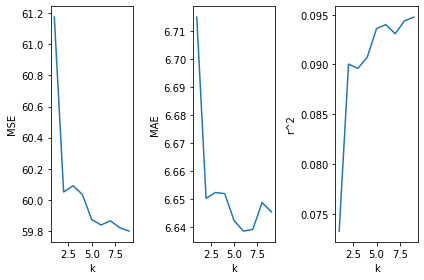

Selected features:  ['x0' 'x2' 'x4' 'x6' 'x7' 'x8' 'x9' 'x10' 'x13']
Model coefficients:  [[ 2.32442119e-01 -8.19405000e+01 -1.24217423e+01  1.11732287e+01
  -3.78708493e+02 -3.74766014e+01  7.94157967e+01  2.94833521e+00
   1.25224574e+01]]
Model intercept:  [3.62351321]


In [69]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = linear_model.LinearRegression()
fselection = SelectKBest(r_regression, k = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)

#### 3. Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

In [70]:
from sklearn.feature_selection import SequentialFeatureSelector

################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
print("---------------- WRAPPER SELECTION ----------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        regr_cv = linear_model.LinearRegression()

        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
---------------- WRAPPER SELECTION ----------------
---- n features = 1
MSE: 61.16136215066884   MAE: 6.714880851525959   R^2: 0.07378184291508232
---- n features = 2
MSE: 60.06734185765474   MAE: 6.65047366521228   R^2: 0.08993583048279433
---- n features = 3
MSE: 60.01152135970888   MAE: 6.64654947120294   R^2: 0.09147629703427604
---- n features = 4
MSE: 60.0830552639873   MAE: 6.65003142190194   R^2: 0.08937716771953294
---- n features = 5
MSE: 60.046736499097335   MAE: 6.646313875108554   R^2: 0.09082264581586255
---- n features = 6
MSE: 60.15524211708055   MAE: 6.653076426991136   R^2: 0.08826122368458311
---- n features = 7
MSE: 60.09135294589309   MAE: 6.644698565052657   R^2: 0.0900030423903243
---- n features = 8
MSE: 59.99969842234283   MAE: 6.6751435506053625   R^2: 0.09143128410757048
---- n features = 9
MSE: 59.948591021894586   MAE: 6.675300380942545   R^2: 0.09154425150660565
Optimal number of features:  9


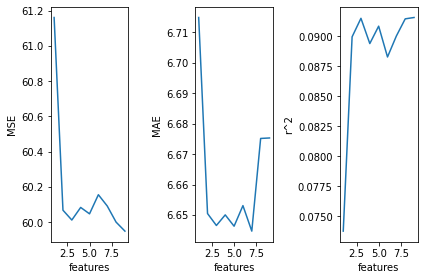

Selected features:  ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x10' 'x13']
Model coefficients:  [[ 2.34916565e-01  9.47142993e-03 -6.85631774e+01 -4.01117996e+04
  -3.25001421e+01  1.33650251e+04 -9.95783776e-02  6.28827924e+00
   1.38316113e+01]]
Model intercept:  [2.56137755]


In [71]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = linear_model.LinearRegression()
fselection = SequentialFeatureSelector(regr, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)

#### 4. Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo. Reporta los predictores óptimos encontrados por el método.

In [72]:
#------------------------------------------------------------------------------------------------------------------
#   Recursive feature selection 
#------------------------------------------------------------------------------------------------------------------

from sklearn.feature_selection import RFE

################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
print("--------------- RECURSIVE SELECTION ---------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        regr_cv = linear_model.LinearRegression()

        fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
--------------- RECURSIVE SELECTION ---------------
---- n features = 1
MSE: 65.76510884382762   MAE: 6.950878760185704   R^2: 0.0037645558470920993
---- n features = 2
MSE: 65.69962489210096   MAE: 6.940458446126646   R^2: 0.00553183234179524
---- n features = 3
MSE: 65.59125984812411   MAE: 6.927069140530925   R^2: 0.007247103834636603
---- n features = 4
MSE: 65.6818558321831   MAE: 6.931594033247256   R^2: 0.005021547819924565
---- n features = 5
MSE: 65.35601834809556   MAE: 6.931107299592901   R^2: 0.010672286929717023
---- n features = 6
MSE: 64.7466936803547   MAE: 6.878076775382262   R^2: 0.01987334358959658
---- n features = 7
MSE: 65.12631580148609   MAE: 6.90778077505212   R^2: 0.01264604608304869
---- n features = 8
MSE: 63.13304761610591   MAE: 6.774519896707392   R^2: 0.04286883153991052
---- n features = 9
MSE: 61.44210076592229   MAE: 6.659175637217873   R^2: 0.06877877478590733
Optimal number of features:  9


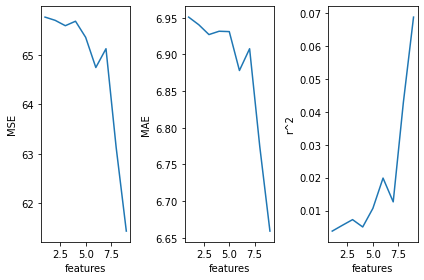

Selected features:  ['x2' 'x3' 'x4' 'x5' 'x7' 'x8' 'x9' 'x12' 'x13']
Model coefficients:  [[-4.21734714e+01 -5.27340468e+04 -3.02359779e+02  1.76322592e+04
  -5.87995771e+03  6.90510348e+01  1.93321384e+03 -2.56332454e+01
   2.78140914e+01]]
Model intercept:  [32.68248611]


In [73]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = linear_model.LinearRegression()
fselection = RFE(regr, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Model coefficients: ", regr.coef_)
print("Model intercept: ", regr.intercept_)

#### 5. Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.

In [74]:
from sklearn.neighbors import KNeighborsRegressor

##### METODO FILTER

In [75]:
#------------------------------------------------------------------------------------------------------------------
# Find optimal number of features using cross-validation
# FILTER
#------------------------------------------------------------------------------------------------------------------
print("----- Optimal selection of number of features -----")
print("----------------- FILTER SELECTION -----------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     
        
        fselection_cv = SelectKBest(r_regression, k = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv = KNeighborsRegressor(n_neighbors=5) # LinearRegression --> KNN
        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
----------------- FILTER SELECTION -----------------
---- n features = 1
MSE: 48.29611253522526   MAE: 4.750310498723404   R^2: 0.268088081187167
---- n features = 2
MSE: 24.915874830676696   MAE: 3.54140331574468   R^2: 0.6227272390390443
---- n features = 3
MSE: 22.289202849171268   MAE: 3.272341606808511   R^2: 0.661506896435775
---- n features = 4
MSE: 22.417087654280785   MAE: 3.2881933923404256   R^2: 0.660545339833124
---- n features = 5
MSE: 21.459499767300223   MAE: 3.233451901276596   R^2: 0.6748929172250986
---- n features = 6
MSE: 22.220282366385156   MAE: 3.263428738723404   R^2: 0.6629976297391164
---- n features = 7
MSE: 21.211810581183794   MAE: 3.209076333617021   R^2: 0.6788600977660589
---- n features = 8
MSE: 21.86354376128967   MAE: 3.2383500187234042   R^2: 0.6689965918979915
---- n features = 9
MSE: 16.011292366530043   MAE: 2.5931766604255317   R^2: 0.7563930223375073
Optimal number of features:  9


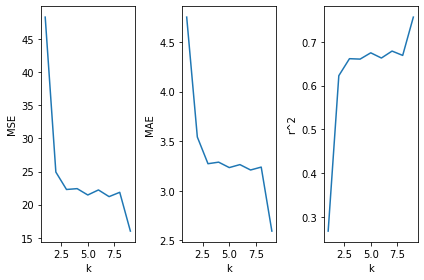

Selected features:  ['x0' 'x2' 'x4' 'x6' 'x7' 'x8' 'x9' 'x10' 'x13']


KNeighborsRegressor()

In [76]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = KNeighborsRegressor() # linear_model.LinearRegression() -> KNN
fselection = SelectKBest(r_regression, k = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

##### METODO WRAPPER

In [77]:
################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
print("---------------- WRAPPER SELECTION ----------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        regr_cv = KNeighborsRegressor(n_neighbors=5) # LINEAR REGRESSION -> KNN

        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
---------------- WRAPPER SELECTION ----------------
---- n features = 1
MSE: 60.246674442795644   MAE: 5.801030852765957   R^2: 0.08759882712984568
---- n features = 2
MSE: 33.34320816772011   MAE: 4.138727281702128   R^2: 0.49615911128646556
---- n features = 3
MSE: 23.831305453509174   MAE: 3.2459111080851066   R^2: 0.6454004422198045
---- n features = 4
MSE: 10.691616195588425   MAE: 2.2728416306382977   R^2: 0.8381773336940848
---- n features = 5
MSE: 10.282840889221651   MAE: 2.2103280102127663   R^2: 0.8445147456388995
---- n features = 6
MSE: 22.72019364512606   MAE: 3.0970031148936172   R^2: 0.6537347385359589
---- n features = 7
MSE: 22.175839089903864   MAE: 3.0476611029787235   R^2: 0.6654285480554479
---- n features = 8
MSE: 10.404622455322961   MAE: 2.2247268221276597   R^2: 0.8425063634020491
---- n features = 9
MSE: 21.23577970423278   MAE: 3.0061730621276594   R^2: 0.6766973619114662
Optimal number of features:  5


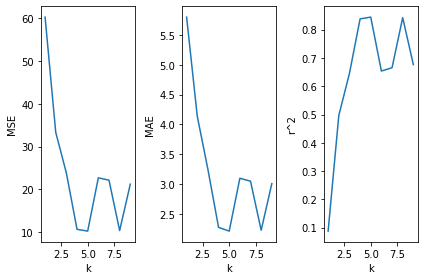

Selected features:  ['x0' 'x2' 'x6' 'x8' 'x13']


KNeighborsRegressor()

In [78]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features using KNN
regr = KNeighborsRegressor(n_neighbors=5) # LINEAR R --> KNN
fselection = SelectKBest(r_regression, k=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

#### 6. Busca al menos otros 4 modelos de regresión no lineal, y lleva a cabo los pasos del 1 al 5.

Reminder PASOS:

**1.** Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.

**2.** Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

**3.** Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

**4.** Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo. Reporta los predictores óptimos encontrados por el método.

**5.** Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.

*GRACE:* Eliminamos el Paso 1 y 5, para este Paso 6 dado que:

- El paso 1 pide una reregsión lineal y queremos ahora no lineales
- El paso 5 ya hace una regresión no lineal (kNN), no vale la pena repetirlo

Nos quedamos con el 2 -> A , 3 -> B, 4 -> C

#### MODELO 1. GRADIENT BOOSTING REGRESSOR

##### **A.** Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

#------------------------------------------------------------------------------------------------------------------
# Find optimal number of features using cross-validation
# FILTER
#------------------------------------------------------------------------------------------------------------------
print("----- Optimal selection of number of features -----")
print("----------------- FILTER SELECTION -----------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     
        
        fselection_cv = SelectKBest(r_regression, k = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv = GradientBoostingRegressor()
        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
----------------- FILTER SELECTION -----------------
---- n features = 1
MSE: 24.764564791618273   MAE: 3.9853370181399392   R^2: 0.6249963857467588
---- n features = 2
MSE: 24.153020737164717   MAE: 3.932470671673518   R^2: 0.6340792201016352
---- n features = 3
MSE: 23.955042437879914   MAE: 3.938692961316274   R^2: 0.6370795791219027
---- n features = 4
MSE: 23.12526950522358   MAE: 3.857064214204351   R^2: 0.6499117522740445
---- n features = 5
MSE: 23.618955261547747   MAE: 3.9229283667432613   R^2: 0.6421920077201734
---- n features = 6
MSE: 23.431237168962777   MAE: 3.9089362617472814   R^2: 0.6453109231790506
---- n features = 7
MSE: 23.505640786477212   MAE: 3.922387810270041   R^2: 0.6439411909752183
---- n features = 8
MSE: 23.10606284298398   MAE: 3.8636599184313676   R^2: 0.650314575655824
---- n features = 9
MSE: 22.86365673903294   MAE: 3.8462543591529554   R^2: 0.6536126046733083
Optimal number of features:  9


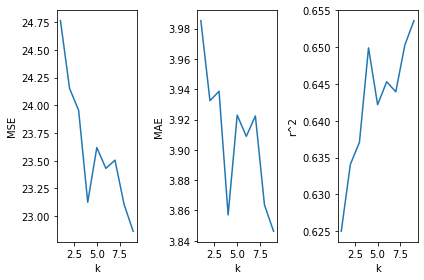

Selected features:  ['x0' 'x2' 'x4' 'x6' 'x7' 'x8' 'x9' 'x10' 'x13']
Feature importances: [0.929131   0.01031222 0.00693149 0.00310831 0.00251368 0.01276572
 0.0055333  0.01682146 0.01288283]


In [83]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = GradientBoostingRegressor()
fselection = SelectKBest(r_regression, k = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Feature importances:", regr.feature_importances_)

##### **B.** Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
print("---------------- WRAPPER SELECTION ----------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        regr_cv = GradientBoostingRegressor()

        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
---------------- WRAPPER SELECTION ----------------
---- n features = 1
MSE: 65.07859163983865   MAE: 6.878019949102869   R^2: 0.014122444789345124
---- n features = 2
MSE: 47.70782216933044   MAE: 5.569030477429966   R^2: 0.285371547966795
---- n features = 3
MSE: 60.206879939076615   MAE: 6.551982361778473   R^2: 0.08842872183264247
---- n features = 4
MSE: 51.38918087513417   MAE: 5.872266154574374   R^2: 0.21521201870386192
---- n features = 5
MSE: 52.08286554891821   MAE: 5.9105178477405556   R^2: 0.21720347415356384
---- n features = 6
MSE: 43.48949924401955   MAE: 5.261063446523245   R^2: 0.341444284453185
---- n features = 7
MSE: 35.32918422873551   MAE: 4.657021901910687   R^2: 0.4696404170024023
---- n features = 8
MSE: 51.0869966225152   MAE: 5.8594843935241965   R^2: 0.22337602969549425
---- n features = 9
MSE: 58.94318238498647   MAE: 6.436163727761674   R^2: 0.10728658219899936
Optimal number of features:  7


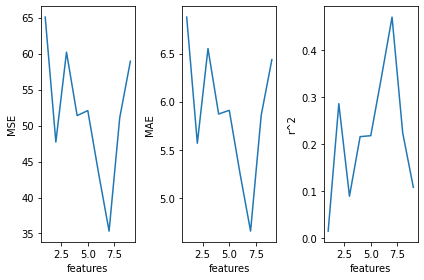

Selected features:  ['x2' 'x3' 'x5' 'x7' 'x9' 'x13' 'x14']
Feature importances: [0.10913373 0.03841733 0.15137298 0.06361002 0.13343756 0.29311274
 0.21091564]


In [85]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = GradientBoostingRegressor()
fselection = SequentialFeatureSelector(regr, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Feature importances:", regr.feature_importances_)

##### **C.** Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo. Reporta los predictores óptimos encontrados por el método.

In [86]:
#------------------------------------------------------------------------------------------------------------------
#   Recursive feature selection 
#------------------------------------------------------------------------------------------------------------------

from sklearn.feature_selection import RFE

################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
print("--------------- RECURSIVE SELECTION ---------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        regr_cv = GradientBoostingRegressor()

        fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
--------------- RECURSIVE SELECTION ---------------
---- n features = 1
MSE: 24.86461783840975   MAE: 3.9970016255409795   R^2: 0.6230558429101098
---- n features = 2
MSE: 18.465103118442265   MAE: 3.3032878907294694   R^2: 0.7201387378918725
---- n features = 3
MSE: 15.678117279182391   MAE: 3.075744109062968   R^2: 0.7627149926183354
---- n features = 4
MSE: 14.347686017122225   MAE: 2.9470768819073236   R^2: 0.7826862951211564
---- n features = 5
MSE: 15.229555959345944   MAE: 3.0747640093590016   R^2: 0.7692279324860825
---- n features = 6
MSE: 16.09459340648603   MAE: 3.1433803260398614   R^2: 0.7563658510368928
---- n features = 7
MSE: 15.49263137471694   MAE: 3.111085318772643   R^2: 0.7654670631137804
---- n features = 8
MSE: 15.717534130589996   MAE: 3.135059725881496   R^2: 0.7623853829488703
---- n features = 9
MSE: 15.396241613361013   MAE: 3.106387441820556   R^2: 0.7668538731416393
Optimal number of features:  4


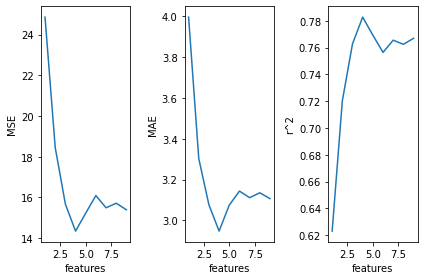

Selected features:  ['x0' 'x1' 'x12' 'x14']


GradientBoostingRegressor()

In [88]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = GradientBoostingRegressor()
fselection = RFE(regr, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

#### MODELO 2. DECISION TREE

##### **A.** Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

In [89]:
from sklearn.tree import DecisionTreeRegressor

#------------------------------------------------------------------------------------------------------------------
# Find optimal number of features using cross-validation
# FILTER
#------------------------------------------------------------------------------------------------------------------
print("----- Optimal selection of number of features -----")
print("----------------- FILTER SELECTION -----------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     
        
        fselection_cv = SelectKBest(r_regression, k = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv = DecisionTreeRegressor()
        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
----------------- FILTER SELECTION -----------------
---- n features = 1
MSE: 24.330420850375376   MAE: 3.863492599944897   R^2: 0.6313535256803677
---- n features = 2
MSE: 41.61434815517255   MAE: 4.201415638297872   R^2: 0.3696072121648688
---- n features = 3
MSE: 37.26871898959149   MAE: 3.8749996765957446   R^2: 0.43376688409820163
---- n features = 4
MSE: 34.81969746594043   MAE: 3.7289675234042554   R^2: 0.47231571940119677
---- n features = 5
MSE: 32.24197208848   MAE: 3.5658265191489362   R^2: 0.5118185857963713
---- n features = 6
MSE: 32.42228828660085   MAE: 3.5995485276595742   R^2: 0.5077189818875086
---- n features = 7
MSE: 30.113965526180426   MAE: 3.443173872340426   R^2: 0.5436686228282838
---- n features = 8
MSE: 27.282786447537024   MAE: 3.076455285106383   R^2: 0.5871620954796561
---- n features = 9
MSE: 26.657869632302983   MAE: 2.978513157446809   R^2: 0.5956700995300597
Optimal number of features:  1


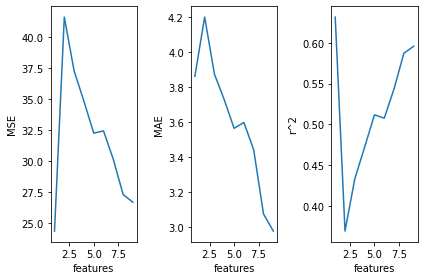

Selected features:  ['x0']


DecisionTreeRegressor()

In [90]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

regr = DecisionTreeRegressor()
fselection = SelectKBest(r_regression, k=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

##### **B.** Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

In [91]:
################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
print("---------------- WRAPPER SELECTION ----------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        regr_cv = DecisionTreeRegressor()

        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
---------------- WRAPPER SELECTION ----------------
---- n features = 1
MSE: 66.0435246173415   MAE: 6.95674029026232   R^2: -1.6831348966150907e-05
---- n features = 2
MSE: 10.930128687285782   MAE: 2.4818164423520654   R^2: 0.8343313231255316
---- n features = 3
MSE: 6.625720389363583   MAE: 1.094756875744681   R^2: 0.8999262671745631
---- n features = 4
MSE: 10.358575148396595   MAE: 1.4489514382978725   R^2: 0.843430573722389
---- n features = 5
MSE: 9.953543353276595   MAE: 1.204427029787234   R^2: 0.849287478576219
---- n features = 6
MSE: 11.046356726987236   MAE: 1.4959353021276596   R^2: 0.8309735505118965
---- n features = 7
MSE: 11.09206539586383   MAE: 1.526766025531915   R^2: 0.8325104783780362
---- n features = 8
MSE: 8.779937491889363   MAE: 1.1171091234042554   R^2: 0.8671187554287613
---- n features = 9
MSE: 7.033395289068936   MAE: 0.7024832340425533   R^2: 0.8935370738155684
Optimal number of features:  3


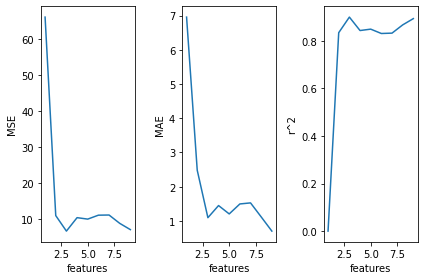

Selected features:  ['x0' 'x3' 'x14']


DecisionTreeRegressor()

In [93]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = DecisionTreeRegressor()
fselection = SequentialFeatureSelector(regr, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)


##### **C.** Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo. Reporta los predictores óptimos encontrados por el método.

In [94]:
#------------------------------------------------------------------------------------------------------------------
#   Recursive feature selection 
#------------------------------------------------------------------------------------------------------------------

from sklearn.feature_selection import RFE

################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
print("--------------- RECURSIVE SELECTION ---------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        regr_cv = DecisionTreeRegressor()

        fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
--------------- RECURSIVE SELECTION ---------------
---- n features = 1
MSE: 24.317127780094214   MAE: 3.862374951490293   R^2: 0.630755885682157
---- n features = 2
MSE: 10.835329904726908   MAE: 1.3326313089361703   R^2: 0.8376312975373013
---- n features = 3
MSE: 11.033082337112166   MAE: 0.9374294164539008   R^2: 0.8335359368318095
---- n features = 4
MSE: 3.5225638814195745   MAE: 0.33721879148936174   R^2: 0.9467964398790268
---- n features = 5
MSE: 3.3661776655387228   MAE: 0.35412847659574476   R^2: 0.9487533217559445
---- n features = 6
MSE: 4.003043076999149   MAE: 0.438547455319149   R^2: 0.939602012132086
---- n features = 7
MSE: 4.7834007687455316   MAE: 0.5260925617021277   R^2: 0.9274233110773524
---- n features = 8
MSE: 5.236698277712341   MAE: 0.5596859914893618   R^2: 0.9206673491932087
---- n features = 9
MSE: 5.702739787911489   MAE: 0.5924543659574468   R^2: 0.9137570038493517
Optimal number of features:  5


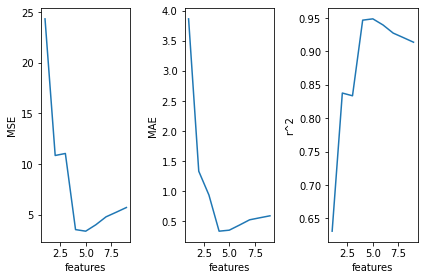

Selected features:  ['x0' 'x1' 'x7' 'x12' 'x14']


DecisionTreeRegressor()

In [96]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = DecisionTreeRegressor()
fselection = RFE(regr, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

#### MODELO 3. RANDOM FOREST

##### **A.** Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

In [97]:
from sklearn.ensemble import RandomForestRegressor

#------------------------------------------------------------------------------------------------------------------
# Find optimal number of features using cross-validation
# FILTER
#------------------------------------------------------------------------------------------------------------------
print("----- Optimal selection of number of features -----")
print("----------------- FILTER SELECTION -----------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     
        
        fselection_cv = SelectKBest(r_regression, k = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv = RandomForestRegressor()
        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
----------------- FILTER SELECTION -----------------
---- n features = 1
MSE: 24.369287940976626   MAE: 3.8654491894711773   R^2: 0.6311559063715928
---- n features = 2
MSE: 29.296128019348714   MAE: 3.697492356290037   R^2: 0.5559587108581364
---- n features = 3
MSE: 22.232171269165157   MAE: 3.2476887376235055   R^2: 0.6629787529070851
---- n features = 4
MSE: 19.651860545757387   MAE: 3.0719339012765956   R^2: 0.7019853124717809
---- n features = 5
MSE: 19.2151816090298   MAE: 3.0381923002553193   R^2: 0.7083140863666524
---- n features = 6
MSE: 18.093362562555008   MAE: 2.9689962873191487   R^2: 0.724677712617431
---- n features = 7
MSE: 17.53503610317096   MAE: 2.913954605617021   R^2: 0.7340894829641093
---- n features = 8
MSE: 15.683308487624876   MAE: 2.765015600510638   R^2: 0.7625409732491084
---- n features = 9
MSE: 13.604076249945077   MAE: 2.4519290982127657   R^2: 0.7940875456167605
Optimal number of features:  9


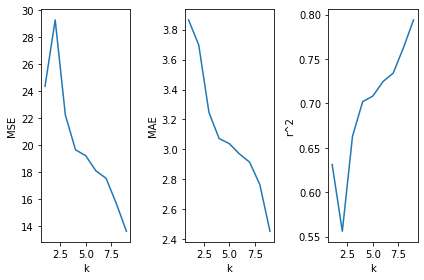

Selected features:  ['x0' 'x2' 'x4' 'x6' 'x7' 'x8' 'x9' 'x10' 'x13']
Feature importances: [0.66544806 0.04137571 0.05891652 0.03013702 0.02543858 0.04321219
 0.02830603 0.05919288 0.04797301]


In [98]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = RandomForestRegressor()
fselection = SelectKBest(r_regression, k = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)
print("Feature importances:", regr.feature_importances_)

##### **B.** Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

In [99]:
################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
print("---------------- WRAPPER SELECTION ----------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        regr_cv = RandomForestRegressor()

        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
---------------- WRAPPER SELECTION ----------------
---- n features = 1
MSE: 66.09389822246051   MAE: 6.960247110669341   R^2: -0.0013378153594672648
---- n features = 2
MSE: 36.387816383503306   MAE: 4.343825719202871   R^2: 0.4483800118164057
---- n features = 3
MSE: 62.9722148148259   MAE: 6.143004408331509   R^2: 0.0555607168859545
---- n features = 4
MSE: 38.56700272112519   MAE: 4.145245411347518   R^2: 0.428246222129218
---- n features = 5
MSE: 37.97460617376798   MAE: 4.336239997446809   R^2: 0.41448931337780265
---- n features = 6
MSE: 38.25378316676401   MAE: 4.60548174280851   R^2: 0.41997726927007495
---- n features = 7
MSE: 45.142255182441616   MAE: 5.189304875404255   R^2: 0.3175248386772275
---- n features = 8
MSE: 32.69346771728972   MAE: 3.794176868425532   R^2: 0.5026646228069207
---- n features = 9
MSE: 43.22934335866652   MAE: 4.845802464340425   R^2: 0.3479471610074273
Optimal number of features:  8


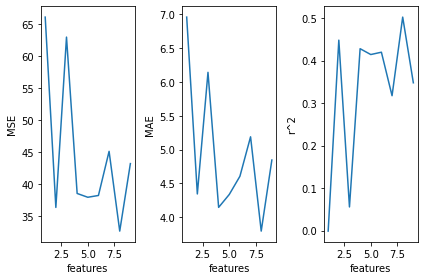

Selected features:  ['x1' 'x3' 'x5' 'x6' 'x7' 'x10' 'x13' 'x14']


RandomForestRegressor()

In [100]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

regr = RandomForestRegressor()
fselection = SequentialFeatureSelector(regr, n_features_to_select=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

##### **C.** Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo. Reporta los predictores óptimos encontrados por el método.

In [101]:
#------------------------------------------------------------------------------------------------------------------
#   Recursive feature selection 
#------------------------------------------------------------------------------------------------------------------

from sklearn.feature_selection import RFE

################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
print("--------------- RECURSIVE SELECTION ---------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        regr_cv = RandomForestRegressor()

        fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
--------------- RECURSIVE SELECTION ---------------
---- n features = 1
MSE: 24.272947147965418   MAE: 3.8612975331394823   R^2: 0.6322584465394725
---- n features = 2
MSE: 20.473261401955675   MAE: 2.974728264009321   R^2: 0.689916942748059
---- n features = 3
MSE: 7.5278891178122205   MAE: 1.2000291222127664   R^2: 0.8859740320376863
---- n features = 4
MSE: 2.275380504820601   MAE: 0.4518507485957448   R^2: 0.9653019584900221
---- n features = 5
MSE: 2.0007105729771304   MAE: 0.4313618316595743   R^2: 0.9697508985785909
---- n features = 6
MSE: 1.7846592593844697   MAE: 0.4655994410212765   R^2: 0.9731096257871723
---- n features = 7
MSE: 2.029178055503246   MAE: 0.5330757111489363   R^2: 0.9694558677857111
---- n features = 8
MSE: 2.178052245017098   MAE: 0.577453378042553   R^2: 0.9669241346666141
---- n features = 9
MSE: 2.242051792313009   MAE: 0.6053375339574467   R^2: 0.9660159930187516
Optimal number of features:  6


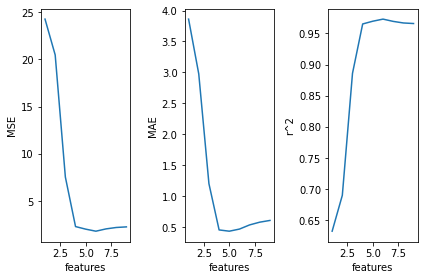

Selected features:  ['x0' 'x1' 'x9' 'x11' 'x12' 'x14']


RandomForestRegressor()

In [102]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

# Fit model with optimal number of features
regr = RandomForestRegressor()
fselection = RFE(regr, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
regr.fit(x_transformed, y)

#### MODELO 4. SVR

##### **A.** Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

In [103]:
from sklearn.svm import SVR
#------------------------------------------------------------------------------------------------------------------
# Find optimal number of features using cross-validation
# FILTER
#------------------------------------------------------------------------------------------------------------------
print("----- Optimal selection of number of features -----")
print("----------------- FILTER SELECTION -----------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     
        
        fselection_cv = SelectKBest(r_regression, k = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv = SVR()
        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
----------------- FILTER SELECTION -----------------
---- n features = 1
MSE: 54.55848170106956   MAE: 5.8939441236218   R^2: 0.1739772547242894
---- n features = 2
MSE: 60.84106700199023   MAE: 6.6766149225289295   R^2: 0.07883516951607743
---- n features = 3
MSE: 61.09954894771947   MAE: 6.686799119347681   R^2: 0.07462294723054715
---- n features = 4
MSE: 61.08856549404574   MAE: 6.685390405481121   R^2: 0.07526851696123382
---- n features = 5
MSE: 61.156749409114376   MAE: 6.688089273196503   R^2: 0.07259825821275197
---- n features = 6
MSE: 61.27047151238828   MAE: 6.691879872988267   R^2: 0.072001178123722
---- n features = 7
MSE: 61.2288402905268   MAE: 6.689674780594333   R^2: 0.07200896250582281
---- n features = 8
MSE: 61.109070415220245   MAE: 6.685684564260681   R^2: 0.074973437910721
---- n features = 9
MSE: 61.26820254686695   MAE: 6.6875014620258755   R^2: 0.07252110062950365
Optimal number of features:  1


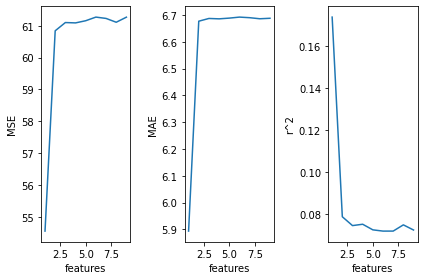

Selected features:  ['x0']


SVR()

In [105]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

svr = SVR()
fselection = SelectKBest(r_regression, k=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
svr.fit(x_transformed, y)

##### **B.** Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

In [106]:
################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
print("---------------- WRAPPER SELECTION ----------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        regr_cv = SVR()

        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
---------------- WRAPPER SELECTION ----------------
---- n features = 1
MSE: 65.33764680454135   MAE: 6.84779625158914   R^2: 0.010162964211005043
---- n features = 2
MSE: 64.81434665818774   MAE: 6.801856685707423   R^2: 0.018879853470512353
---- n features = 3
MSE: 64.54441123897865   MAE: 6.7382849151238915   R^2: 0.02247463734313433
---- n features = 4
MSE: 64.14090896973114   MAE: 6.725450183532317   R^2: 0.02900143252407781
---- n features = 5
MSE: 64.10253103457156   MAE: 6.716609362308129   R^2: 0.029515330263070228
---- n features = 6
MSE: 62.71876828109106   MAE: 6.6497592507415515   R^2: 0.05049283515407497
---- n features = 7
MSE: 63.59044229981955   MAE: 6.698153757598851   R^2: 0.03695565327797723
---- n features = 8
MSE: 63.94671742998577   MAE: 6.727007334761234   R^2: 0.03030913840149201
---- n features = 9
MSE: 62.07699191355846   MAE: 6.648801622329051   R^2: 0.06039446483749302
Optimal number of features:  9


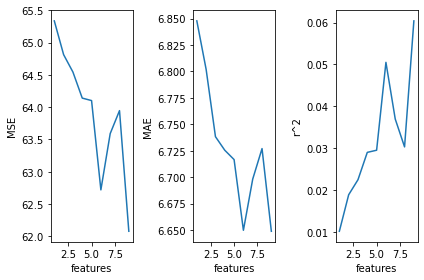

Selected features:  ['x2' 'x3' 'x4' 'x5' 'x7' 'x8' 'x10' 'x13' 'x14']


SVR()

In [107]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

svr = SVR()
fselection = SequentialFeatureSelector(svr, n_features_to_select=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
svr.fit(x_transformed, y)

##### **C.** Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo. Reporta los predictores óptimos encontrados por el método.

In [14]:
#------------------------------------------------------------------------------------------------------------------
#   Recursive feature selection 
#------------------------------------------------------------------------------------------------------------------
from sklearn.svm import LinearSVR
from sklearn.feature_selection import RFE

################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
print("--------------- RECURSIVE SELECTION ---------------")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        regr_cv = LinearSVR()

        fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)    
        r2_cv.append(r2_i)      
    

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    
    print('MSE:', mse, '  MAE:', mae,'  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

----- Optimal selection of number of features -----
--------------- RECURSIVE SELECTION ---------------
---- n features = 1
MSE: 65.78625083407674   MAE: 6.877335962308193   R^2: 0.0028457474876315337
---- n features = 2
MSE: 63.16583746055642   MAE: 6.749456933776592   R^2: 0.04317326192120559
---- n features = 3
MSE: 63.13365214338027   MAE: 6.742140017971579   R^2: 0.04432969840352916
---- n features = 4
MSE: 63.26593310370892   MAE: 6.733913406392304   R^2: 0.04210578659009816
---- n features = 5
MSE: 63.125848841860964   MAE: 6.718169384992359   R^2: 0.04426431467423737
---- n features = 6
MSE: 63.3695520295385   MAE: 6.688718398068265   R^2: 0.040755260981329956
---- n features = 7
MSE: 63.574862382021436   MAE: 6.698921953507842   R^2: 0.03725372595051331
---- n features = 8
MSE: 63.3527892931336   MAE: 6.669598776282157   R^2: 0.04031579193023542
---- n features = 9
MSE: 64.16453370449692   MAE: 6.619504112310385   R^2: 0.02844772428789799
Optimal number of features:  5


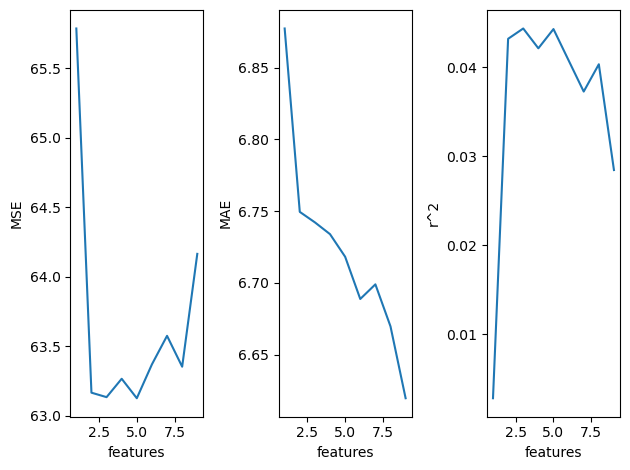

Selected features:  [False False False False False False  True False False  True  True False
  True  True False]


LinearSVR()

In [17]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")

plt.show()

svr = LinearSVR()
fselection = RFE(svr, n_features_to_select=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.support_)

x_transformed = fselection.transform(x)
svr.fit(x_transformed, y)

#### 7. Viendo los resultados de este ejercicio, escriba una conclusión sobre los siguientes puntos:

(a) Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?

Definitivamente no es el modelo lineal el más adecuado ya que el R^2 es 0.0930 y los valores de errores MSE y MAE son muy grandes.

(b)¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?

Random Forest porque tuvo menores errores y mejor valor de $R^2$
MSE: 2.2420  MAE: 0.605337   R^2: 0.96601

(c) Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? 

Si. Las características sobresalientes sonÑ 'x0' 'x1' 'x9' 'x11' 'x12' 'x14', osea Adult mortality, Polio, HIV/AIDS , Population.

(d) ¿Los modelos de regresión no lineal funcionaron mejor que el lineal? ¿Por qué?

Si fueron mejores los modelos no lineales porque el valor de los errores fue menor y con un $R^2$ maor, es decir, se ajustaban mejor a los datos.

(e) ¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? 

Si, que las relaciones entre las variables no son lineales, lo que implica que se requieren de modelos y técnicas complejas.